In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/parq/clean_IVE_tickbidask.parq')

NameError: ignored

In [0]:
data = data.set_index(pd.to_datetime(data.date_time))
data.drop(columns='date_time', inplace=True)
data['dollar'] = data['price']*data['volume']
data.head()

,price,volume,buy,sell,dollar
date_time,,,,,
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012
2018-11-21 09:00:00,266.250000,21.0,21.0,0.0,5591.250000
2018-11-21 09:00:00,266.299988,1.0,1.0,0.0,266.299988
2018-11-21 09:00:00,266.350006,2.0,2.0,0.0,532.700012


# 2.1.
# (a)

In [0]:
def tick_bar(df,m):
  return df.iloc[::m]

In [0]:
tb = tick_bar(data,5015)
len(tb.index)

1049

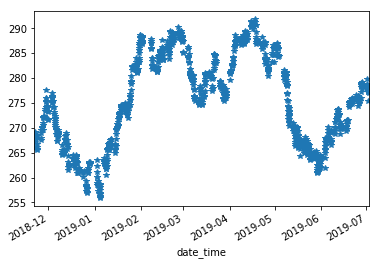

In [0]:
tb.price.plot(marker='*',ls='',label='tick bar')

In [0]:
def volume_bar(df, m):
    aux = df.reset_index()    
    idx = []
    vol_acum = []
    c_v = 0
    for i, v in aux.volume.items():
        c_v = c_v + v 
        if c_v >= m:
            idx.append(i)
            vol_acum.append(c_v)
            c_v = 0
    volume_bar = aux.loc[idx]
    volume_bar.loc[idx, 'cum_vol'] = vol_acum 
    volume_bar = volume_bar.set_index('date_time')
    return volume_bar

In [0]:
vb = volume_bar(data,29200)
len(vb)


1049

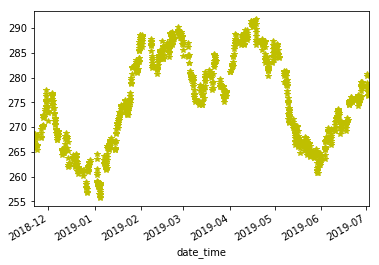

In [0]:
vb.price.plot(marker='*',ls='',c='y')

In [0]:
def dollar_bar(df, m):
    aux = df.reset_index()    
    idx = []
    d_acum = []
    c_dv = 0
    for i, dv in aux.dollar.items():
        c_dv = c_dv + dv 
        if c_dv >= m:
            idx.append(i)
            d_acum.append(c_dv)
            c_dv = 0 
    dollar_bar = aux.loc[idx]
    dollar_bar.loc[idx, 'cum_dollar_vol'] = d_acum 
    dollar_bar = dollar_bar.set_index('date_time')
    return dollar_bar


In [0]:
db = dollar_bar(data,8040000)
len(db)

1049

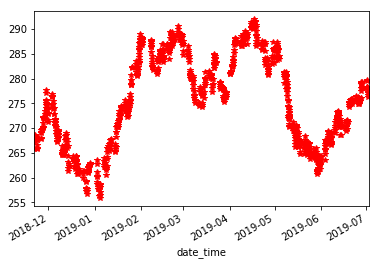

In [0]:
db.price.plot(marker='*',ls='',c='r')

In [0]:
logic_time = {'close':'last'}
time = data.resample('1h').apply(logic_time)['close'].dropna()
len(time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  


1049

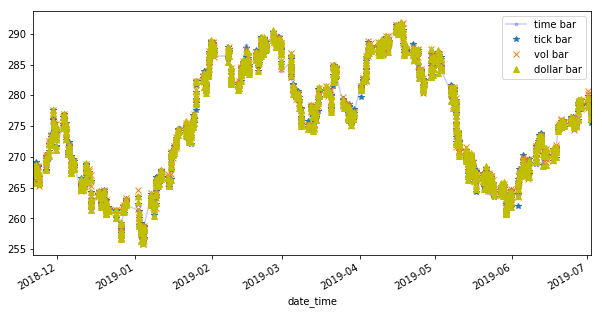

In [0]:


plt.figure(figsize=(10,5))
time.price.plot(marker='o', ms=3, color='b',alpha=0.2,label='time bar')


tb.price.plot(marker='*',                                     ls='',
                                      label='tick bar')
vb.price.plot(marker='x',
                                     ls='',
                                     label='vol bar')
db.price.plot(marker='^',
                                        ls='',
                                        color='y',
                                        label='dollar bar')
plt.legend()

# (b) ??why

In [0]:
weekly_tick_count = tb.price.resample('1w').count()
weekly_vol_count = vb.price.resample('1w').count()
weekly_dollar_count = db.price.resample('1w').count()

7.765136733171444 7.338926930066035 7.287650409072082


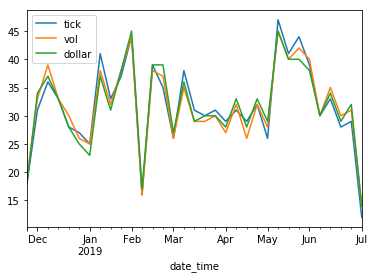

In [0]:
fig, ax = plt.subplots(1)
weekly_tick_count.dropna().plot(ax=ax)
weekly_vol_count.dropna().plot(ax=ax)
weekly_dollar_count.dropna().plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

print(weekly_tick_count.dropna().std(),
weekly_vol_count.dropna().std(),
weekly_dollar_count.dropna().std())

# (c) auto-correlation

In [0]:
timer = np.log(time.price).diff().dropna()

In [0]:
tr = np.log(tb.price).diff().dropna()

vr = np.log(vb.price).diff().dropna()

dr = np.log(db.price).diff().dropna()

In [0]:
s = '\n'
print("return autocorrelation : ", s,"time (daily) bar: ",timer.autocorr(),s, "tick bar: ", tr.autocorr(),s,"volume bar: " ,vr.autocorr(),s,"dollar bar: " , dr.autocorr())



return autocorrelation :  
 time (daily) bar:  0.012616791940503278 
 tick bar:  -0.016308807950058655 
 volume bar:  0.03420785286314626 
 dollar bar:  0.008847900334507434


# (d) volatility X failed
- monthly로 안함

In [0]:
s = '\n'
print("standard deviation : ", s, "tick bar: ", tr.std(),s,"volume bar: " ,vr.std(),s,"dollar bar: " , dr.std())

standard deviation :  
 tick bar:  0.0032542268145379838 
 volume bar:  0.003219250509979423 
 dollar bar:  0.003300471622849768


# (e) normality

In [0]:
from scipy.stats import jarque_bera

In [0]:
jtime,ptime = jarque_bera(timer)
jt,ptick = jarque_bera(tr)
jv,pvolume = jarque_bera(vr)
jd,pdollar = jarque_bera(dr)

In [0]:
print(jtime,jt,jv,jd)
print(ptime, ptick, pvolume, pdollar)

1306.7836832649127 296.2614583137286 440.5849195231698 332.9022801952187
0.0 0.0 0.0 0.0


In [0]:
s = '\n'
print("jarque bera statistics : ", s,"time bar: ",jtime,s, "tick bar: ", jt,s,"volume bar: " ,jv,s,"dollar bar: " , jd)

jarque bera statistics :  
 time bar:  1306.7836832649127 
 tick bar:  296.2614583137286 
 volume bar:  440.5849195231698 
 dollar bar:  332.9022801952187


# 2.2. Dollar Imbalance bar vs. Dollar bar
- serial correlation

In [0]:
!pip install -q mlfinlab

In [0]:
import mlfinlab as ml

In [0]:
from mlfinlab import data_structures

In [0]:
ddd = data.drop(columns=['buy','sell','dollar'])
ddd.tail()
ddd2=ddd.iloc[-5000:]
ddd2.to_csv('/content/drive/My Drive/Colab Notebooks/csv/'+'test3.csv')
ddd2

,price,volume
date_time,,
2019-07-02 13:15:00,277.149994,2.0
2019-07-02 13:15:00,277.149994,1.0
2019-07-02 13:15:00,277.149994,60.0
2019-07-02 13:15:00,277.149994,26.0
2019-07-02 13:15:00,277.149994,2.0
2019-07-02 13:15:00,277.149994,2.0
2019-07-02 13:15:00,277.149994,2.0
2019-07-02 13:15:00,277.149994,8.0
2019-07-02 13:15:00,277.149994,12.0


In [0]:
#tib = data_structures.get_tick_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',3)
#vib = data_structures.get_volume_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',3)
dib = data_structures.get_dollar_imbalance_bars('/content/drive/My Drive/Colab Notebooks/csv/test2.csv',20)

Reading data in batches:
Batch number: 0
Returning bars 



In [0]:
dib

,date_time,open,high,low,close,volume
0,2018-11-26 10:08:00,266.200012,269.399994,265.250000,269.100006,631846.0
1,2018-11-27 12:26:00,269.100006,272.000000,268.450012,272.000000,245143.0
2,2018-11-28 14:04:00,272.000000,273.549988,271.700012,273.549988,185991.0
3,2018-11-29 14:23:00,273.549988,278.000000,273.200012,274.299988,222434.0
4,2018-11-29 14:25:00,274.299988,274.450012,274.250000,274.250000,1687.0
5,2018-11-29 14:25:00,274.250000,274.250000,274.200012,274.200012,417.0
6,2018-11-29 14:25:00,274.200012,274.200012,274.049988,274.049988,922.0
7,2018-11-29 14:26:00,274.049988,274.250000,274.000000,274.250000,918.0
8,2018-11-29 14:27:00,274.250000,274.299988,274.100006,274.100006,1476.0
9,2018-11-29 14:27:00,274.100006,274.149994,274.049988,274.049988,549.0


In [0]:
dib2 = dib.set_index(pd.to_datetime(dib.date_time))
dib2 = dib2.drop(columns='date_time')
dib3 = dib2.close

In [0]:
dib3.tail()

date_time
2019-07-02 15:34:00    276.799988
2019-07-02 15:34:00    276.799988
2019-07-02 15:34:00    276.799988
2019-07-02 15:34:00    276.799988
2019-07-02 15:34:00    276.850006
Name: close, dtype: float64

In [0]:
dibr = np.log(dib3).diff().dropna()
dibr.head()

date_time
2018-11-27 12:26:00    0.010719
2018-11-28 14:04:00    0.005682
2018-11-29 14:23:00    0.002738
2018-11-29 14:25:00   -0.000182
2018-11-29 14:25:00   -0.000182
Name: close, dtype: float64

In [0]:
print("dollar-bar return serial correlation: ", dr.autocorr(),s,"dollar-imbalance-bar return serial correlation: ",dibr.autocorr())

dollar-bar return serial correlation:  0.008847900334507434 
 dollar-imbalance-bar return serial correlation:  -0.1018835664125324


# 2.4. Bollinger Bands vs. CUSUM Filter (dollar bar)
- count 'outside the bands'
- standard deviation
- heteroscedastic

## (a)

In [0]:
n = 20
ma = db.price.rolling(n).mean()
price_pct = 0.025
upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb = pd.concat([db.price, ma, upper_band, lower_band], axis=1).dropna()
bb.columns=['price','ma','upper_band','lower_band']
bb.tail()

,price,ma,upper_band,lower_band
date_time,,,,
2019-07-02 09:45:00,277.750000,278.425002,285.385627,271.464376
2019-07-02 10:28:00,277.850006,278.412502,285.372814,271.452189
2019-07-02 11:10:00,277.049988,278.302501,285.260063,271.344938
2019-07-02 12:30:00,277.250000,278.215001,285.170376,271.259626
2019-07-02 15:01:00,277.049988,278.107500,285.060187,271.154812


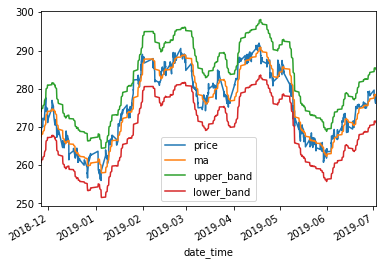

In [0]:
bb.plot()

In [0]:
len(bb[bb.price > bb.upper_band]) + len(bb[bb.price < bb.lower_band])

1

In [0]:
cross_count=0
for i in range(0, len(bb['price'])):
  if bb['price'][i] - bb.upper_band[i] >= 0 and bb['price'][i-1] - bb.upper_band[i-1] < 0:
    cross_count += 1
  if bb['price'][i] - bb.lower_band[i] < 0 and bb['price'][i-1] - bb.lower_band[i-1] >= 0:
    cross_count += 1

cross_count

1

## (b)

In [0]:
from mlfinlab import filters
mlfinlabcusum = filters.cusum_filter(db2.price, 0.05)
len(mlfinlabcusum)

8

In [0]:
def getTEvents(gRaw,h):
  tEvents,sPos,sNeg=[],0,0
  
  diff=np.log(gRaw).diff()
  for i in diff.index[1:]:
    sPos,sNeg=max(0,sPos+diff.loc[i]),min(0,sNeg+diff.loc[i])
    if sNeg<-h:
      sNeg=0;tEvents.append(i)
    elif sPos>h:
      sPos=0;tEvents.append(i)
  
  return tEvents

In [0]:
t_events = getTEvents(db.price, 0.05)
t_events

[Timestamp('2018-12-14 10:15:00'),
 Timestamp('2019-01-15 10:10:00'),
 Timestamp('2019-01-28 14:16:00'),
 Timestamp('2019-03-08 10:34:00'),
 Timestamp('2019-04-08 09:01:00'),
 Timestamp('2019-05-09 11:30:00'),
 Timestamp('2019-05-24 12:22:00'),
 Timestamp('2019-06-19 09:01:00')]

In [0]:
len(t_events)

8

## (c)

In [0]:
up = bb[bb.price > bb.upper_band].price

In [0]:
down = bb[bb.price < bb.lower_band].price

In [0]:
bb_sampled = pd.concat([up,down],)

In [0]:
cusum_sampled = db.price.loc[t_events]
cusum_sampled.tail()

date_time
2019-03-13 11:37:00    274.200012
2019-04-08 09:13:00    288.399994
2019-05-09 13:27:00    275.200012
2019-05-29 10:42:00    260.450012
2019-06-19 09:14:00    275.000000
Name: price, dtype: float64

In [0]:
bb_sampled.rolling(20).std().dropna()

date_time
2019-04-16 12:26:00     7.109072
2019-06-19 09:14:00     6.758139
2019-06-20 10:13:00     6.495259
2019-06-21 11:16:00     6.400770
2019-06-24 13:38:00     6.313905
2019-06-27 14:28:00     5.985097
2019-07-01 09:01:00     5.710021
2018-12-20 09:14:00     7.437670
2018-12-20 15:14:00     8.784687
2018-12-26 13:16:00    10.271362
2019-01-03 13:42:00    11.372017
2019-03-08 09:00:00    11.327788
2019-03-11 09:02:00    11.182429
2019-03-12 10:07:00    10.936677
2019-03-13 11:37:00    10.697237
2019-05-09 13:27:00    10.404375
2019-05-10 09:14:00    10.089207
2019-05-10 12:13:00     9.662551
2019-05-10 15:30:00     9.054172
2019-05-13 15:02:00     8.161806
2019-05-14 13:10:00     6.968303
2019-05-15 11:23:00     6.942039
2019-05-16 11:16:00     6.917378
2019-05-17 10:30:00     6.875863
2019-05-20 09:50:00     6.828209
2019-05-21 09:34:00     6.583089
2019-05-22 09:00:00     6.072990
2019-05-22 13:35:00     5.787032
2019-05-23 11:46:00     5.522943
2019-05-24 11:14:00     4.889573


In [0]:
cusum_sampled.rolling(20).std().dropna()

Series([], Name: price, dtype: float64)

ML Algorithm

In [0]:
len(time)

150

In [0]:
!pip install -q xgboost

In [0]:
from xgboost import XGBRegressor


In [0]:
from mlfinlab import data_structures

In [0]:
data_structures.get_tick_imbalance_bars()